### FOCUS -- PREDICT NO. OF SHARES OF AN ARTICLE

#### BUSINESS CHALLENGE
Company X -- is a global, multi-platform media and entertainment company. Powered by its own proprietary technology, Company X is the go-to source for tech, digital culture and entertainment content for its dedicated and influential audience around
the globe.
Just like any other media company its success depends on the popularity of articles. And one of the key metrics to measure popularity is no. of shares done on article.
Over period of few years Mashable has collected data on around 40,000 articles. 
Challenge is to do analysis and modeling to predict number of shares of an article
given the input parameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


In [3]:
# Chacking for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [4]:
#Separating URLs from the main data
df = df.drop(['url'],axis=1)

### **Detecting Outliers**


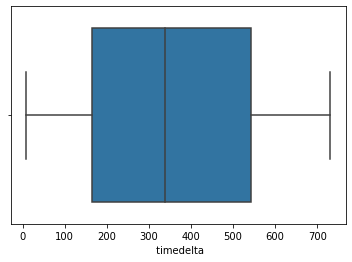

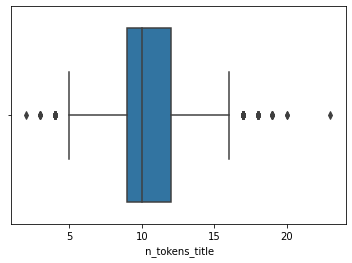

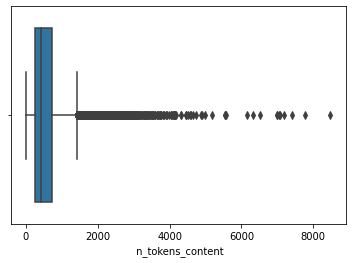

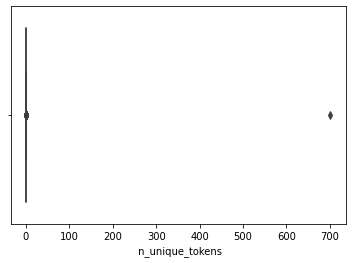

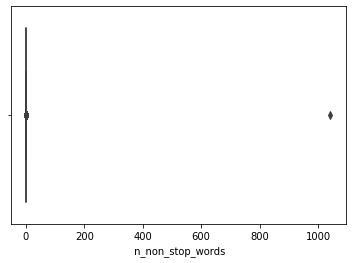

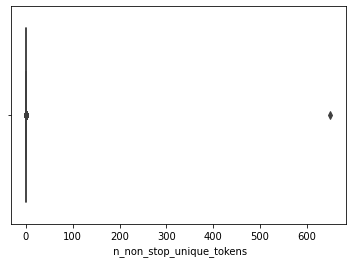

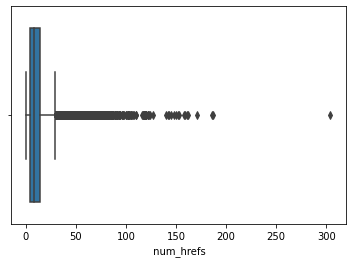

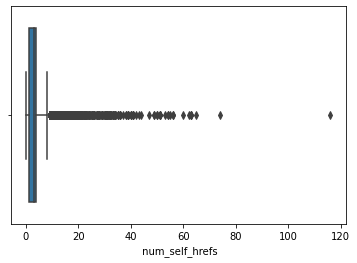

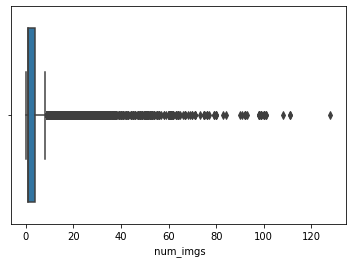

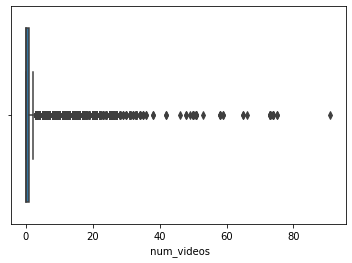

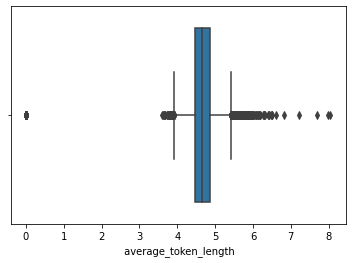

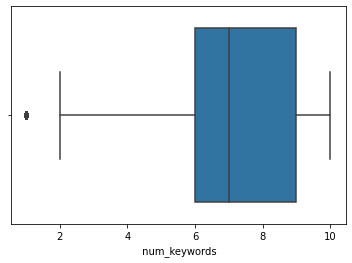

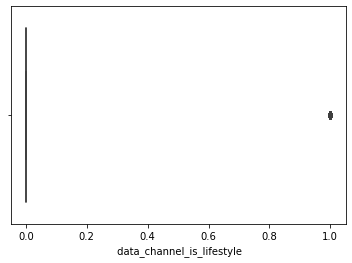

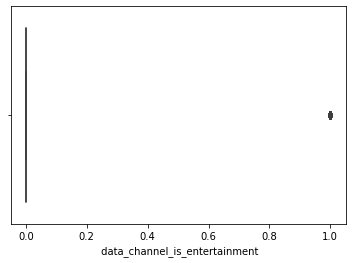

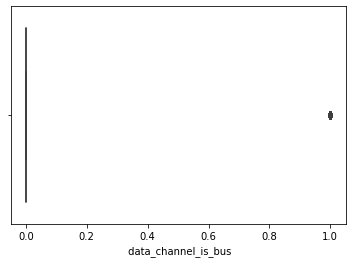

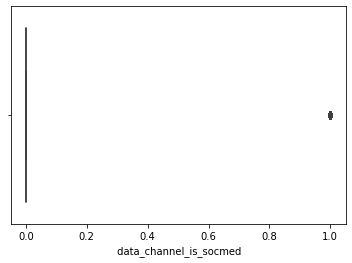

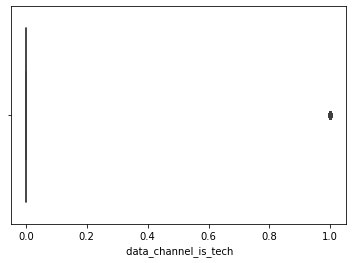

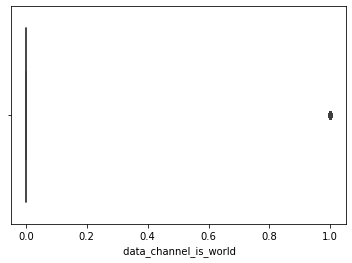

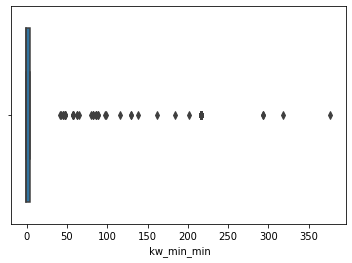

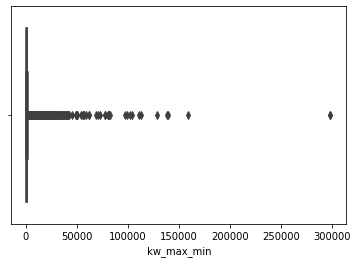

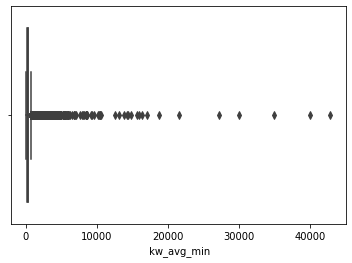

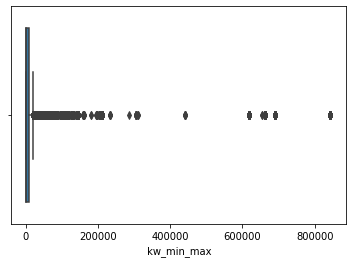

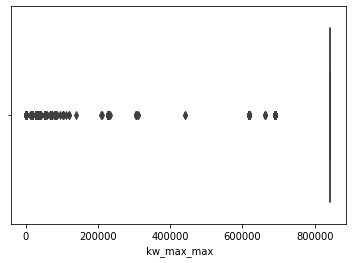

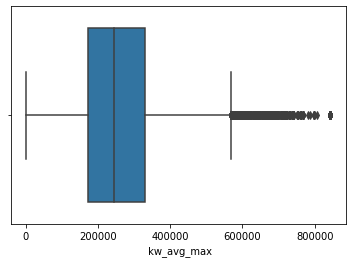

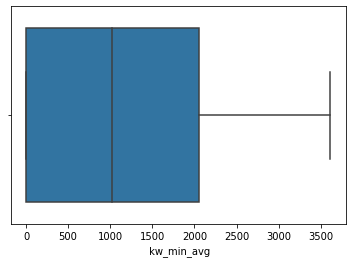

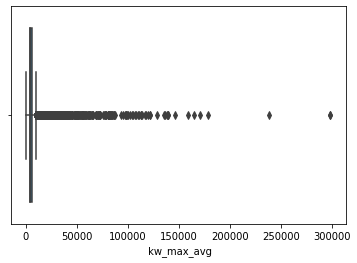

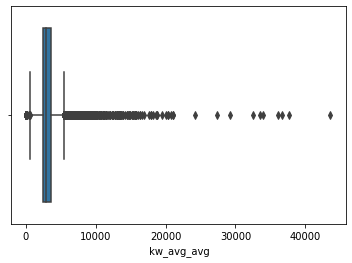

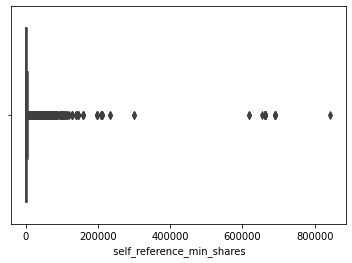

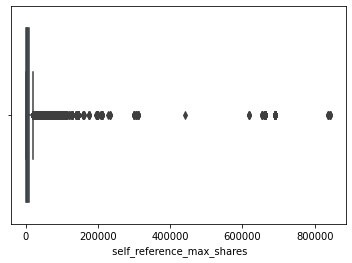

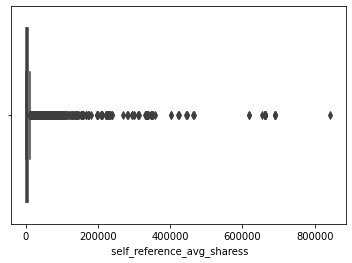

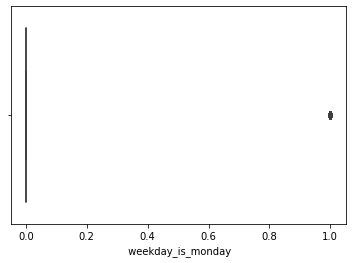

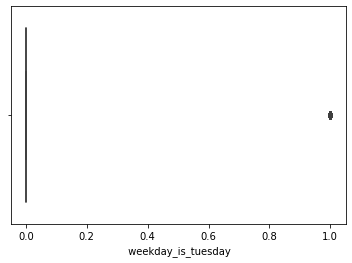

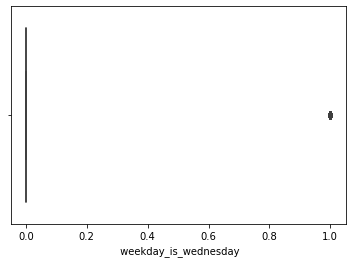

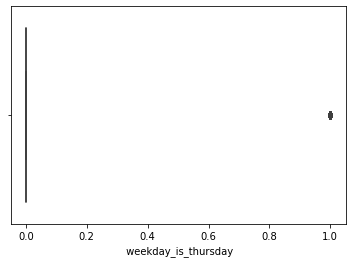

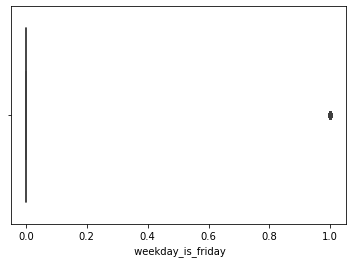

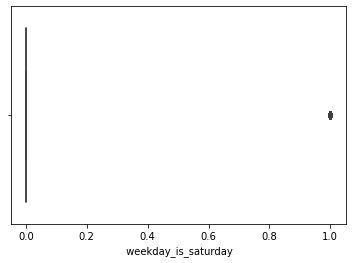

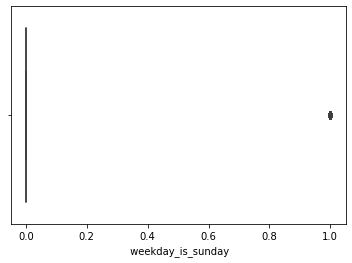

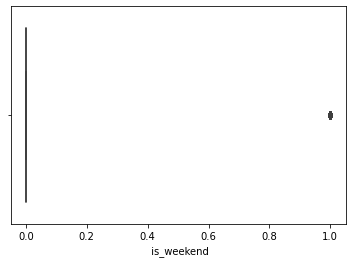

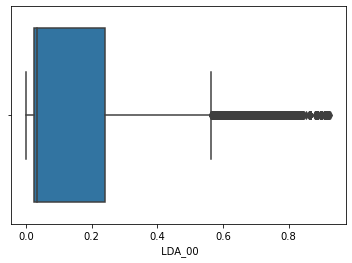

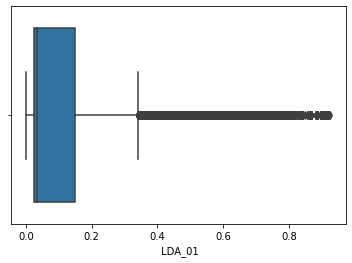

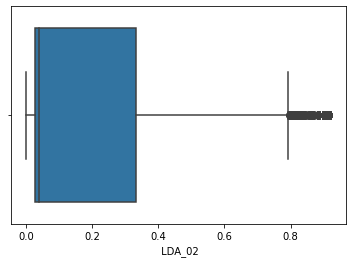

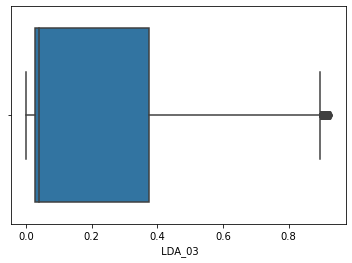

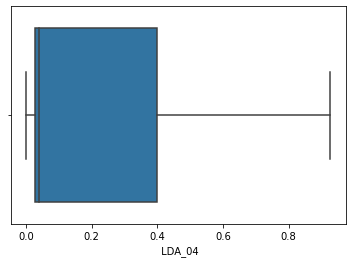

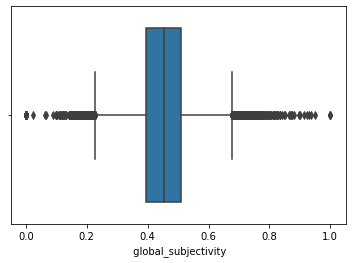

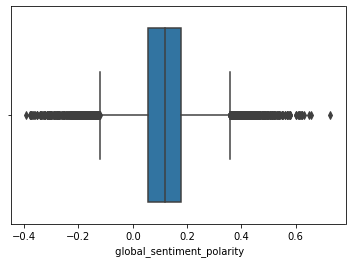

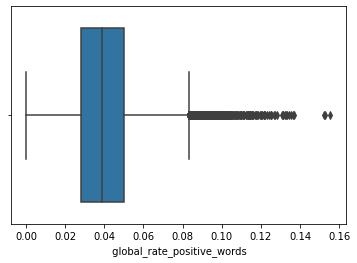

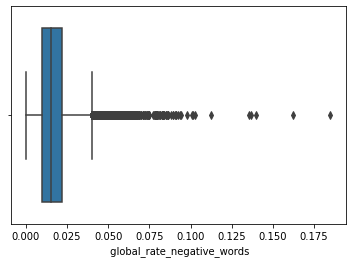

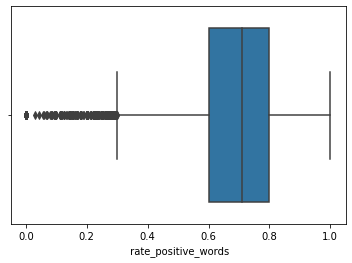

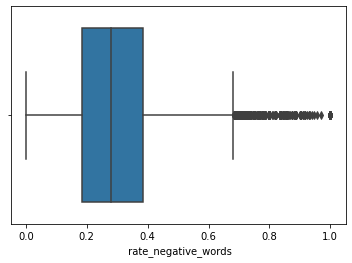

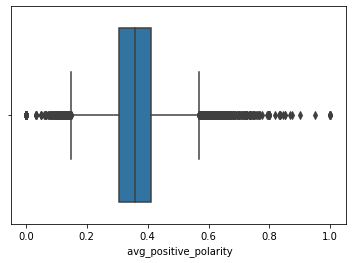

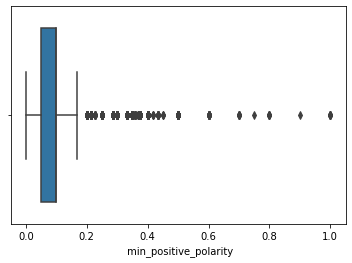

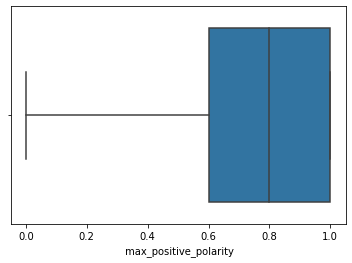

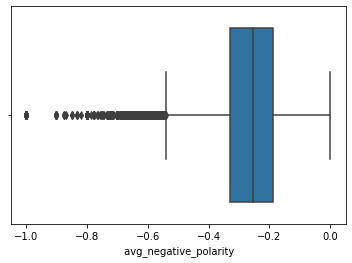

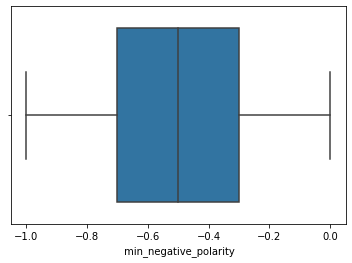

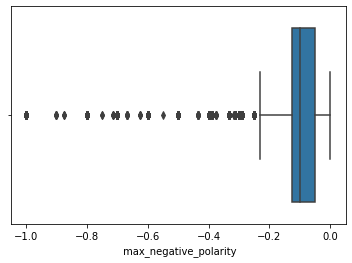

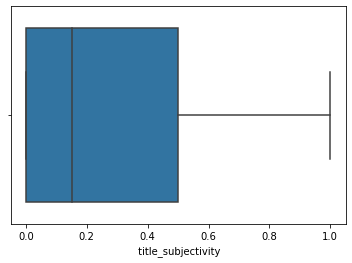

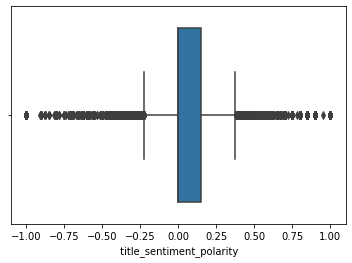

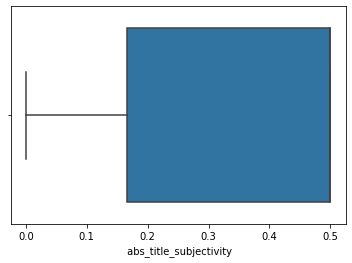

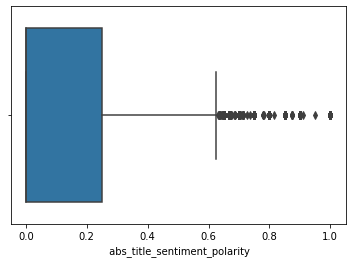

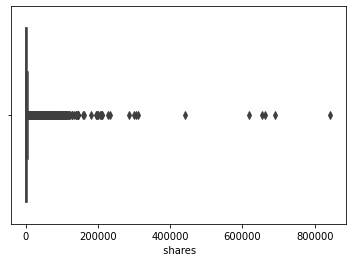

In [5]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

### **Removing Outliers**
#### Using of IQR (Interquartile Range) Method for removing outliers

In [6]:
Q1 = df.quantile(q=0.25) 
Q3 = df.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

IQR for each column:- 
 timedelta                        3.780000e+02
 n_tokens_title                   3.000000e+00
 n_tokens_content                 4.700000e+02
 n_unique_tokens                  1.378252e-01
 n_non_stop_words                 4.314000e-09
 n_non_stop_unique_tokens         1.288902e-01
 num_hrefs                        1.000000e+01
 num_self_hrefs                   3.000000e+00
 num_imgs                         3.000000e+00
 num_videos                       1.000000e+00
 average_token_length             3.764347e-01
 num_keywords                     3.000000e+00
 data_channel_is_lifestyle        0.000000e+00
 data_channel_is_entertainment    0.000000e+00
 data_channel_is_bus              0.000000e+00
 data_channel_is_socmed           0.000000e+00
 data_channel_is_tech             0.000000e+00
 data_channel_is_world            0.000000e+00
 kw_min_min                       5.000000e+00
 kw_max_min                       5.550000e+02
 kw_avg_min                       2.1

#### Sorting and taking the median values from shares column

In [7]:
sorted_shares = df.sort_values(' shares')

median = sorted_shares[' shares'].median() 

q1 = sorted_shares[' shares'].quantile(q=0.25) 

q3 = sorted_shares[' shares'].quantile(q=0.75) 

iqr = q3-q1

#### Finding Upper and Lower Outliers

In [8]:
Inner_bound1 = q1-(iqr*1.5) 
print(f'Inner Boundary 1 = {Inner_bound1}')
Inner_bound2 = q3+(iqr*1.5)  
print(f'Inner Boundary 2 = {Inner_bound2}')
Outer_bound1 = q1-(iqr*3)    
print(f'Outer Boundary 1 = {Outer_bound1}')
Outer_bound2 = q3+(iqr*3)   
print(f'Outer Boundary 2 = {Outer_bound2}')

Inner Boundary 1 = -1835.0
Inner Boundary 2 = 5581.0
Outer Boundary 1 = -4616.0
Outer Boundary 2 = 8362.0


#### So we select the 2nd Outer Boundary for Outlier Removal

In [9]:
Df = df[df[' shares']<=Outer_bound2]

In [10]:
print(f'Data before Removing Outliers = {df.shape}')
print(f'Data after Removing Outliers = {Df.shape}')
print(f'Number of Outliers = {df.shape[0] - Df.shape[0]}')

Data before Removing Outliers = (39644, 60)
Data after Removing Outliers = (36879, 60)
Number of Outliers = 2765


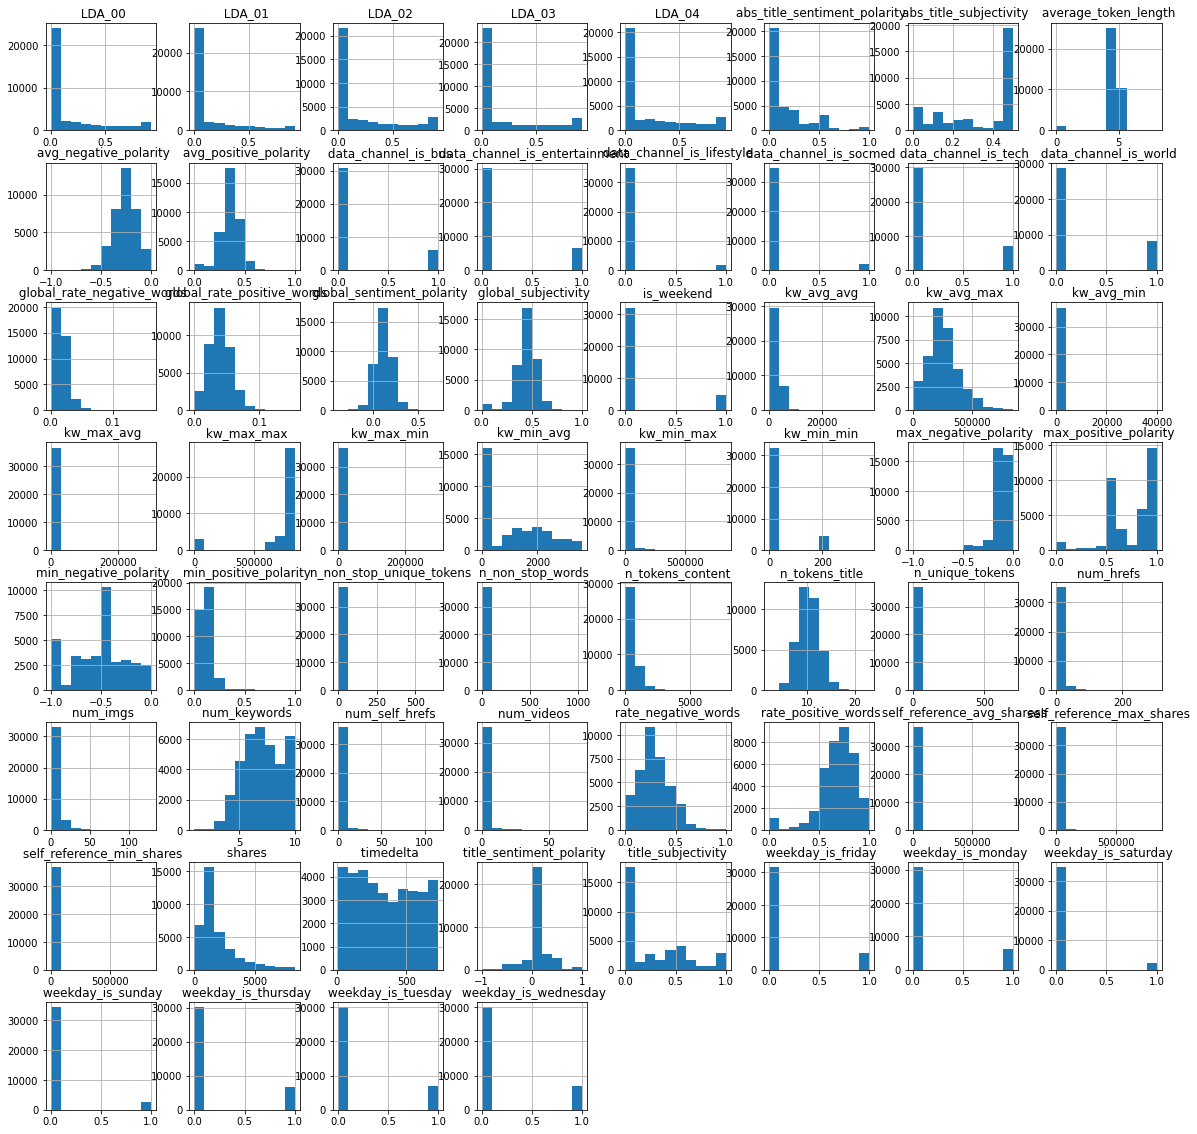

In [11]:
Df.hist(figsize=(20,20))
plt.show()

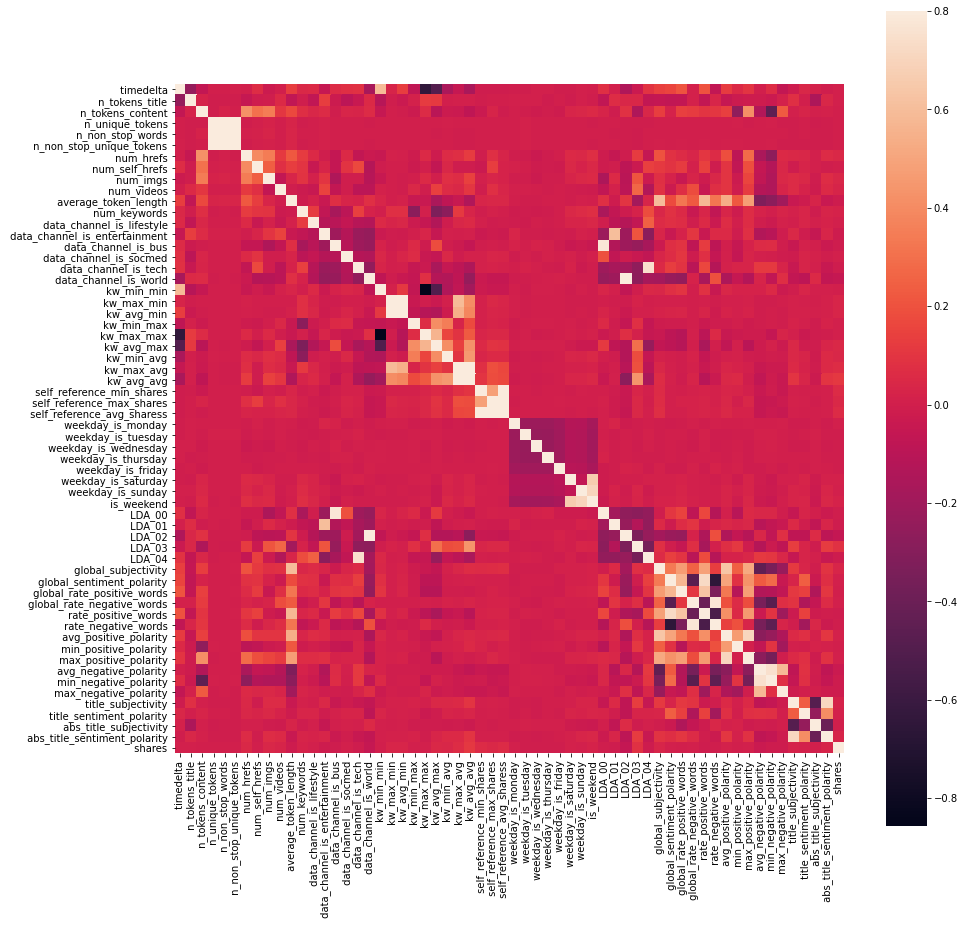

In [12]:
corr = df.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

In [13]:
#Helping Index for referrings
for i in range(len(Df.columns)):
    print(f'{i} -> {Df.columns[i]}')

0 ->  timedelta
1 ->  n_tokens_title
2 ->  n_tokens_content
3 ->  n_unique_tokens
4 ->  n_non_stop_words
5 ->  n_non_stop_unique_tokens
6 ->  num_hrefs
7 ->  num_self_hrefs
8 ->  num_imgs
9 ->  num_videos
10 ->  average_token_length
11 ->  num_keywords
12 ->  data_channel_is_lifestyle
13 ->  data_channel_is_entertainment
14 ->  data_channel_is_bus
15 ->  data_channel_is_socmed
16 ->  data_channel_is_tech
17 ->  data_channel_is_world
18 ->  kw_min_min
19 ->  kw_max_min
20 ->  kw_avg_min
21 ->  kw_min_max
22 ->  kw_max_max
23 ->  kw_avg_max
24 ->  kw_min_avg
25 ->  kw_max_avg
26 ->  kw_avg_avg
27 ->  self_reference_min_shares
28 ->  self_reference_max_shares
29 ->  self_reference_avg_sharess
30 ->  weekday_is_monday
31 ->  weekday_is_tuesday
32 ->  weekday_is_wednesday
33 ->  weekday_is_thursday
34 ->  weekday_is_friday
35 ->  weekday_is_saturday
36 ->  weekday_is_sunday
37 ->  is_weekend
38 ->  LDA_00
39 ->  LDA_01
40 ->  LDA_02
41 ->  LDA_03
42 ->  LDA_04
43 ->  global_subjectivity
44 

### **Exploratory Data Analysis**

In [14]:
a,b = Df[' shares'].mean(),Df[' shares'].median()

In [15]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 1916.4932888635808
Median article share = 1300.0


In [16]:
Wd = Df.columns.values[30:37]
Wd

array([' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday'],
      dtype=object)

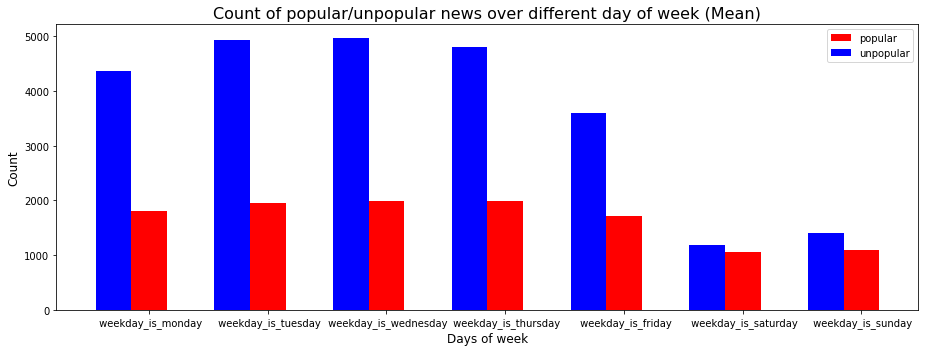

In [17]:
# Ploting graph keeping thresold of mean
Unpop=Df[Df[' shares']<a]
Pop=Df[Df[' shares']>=a]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

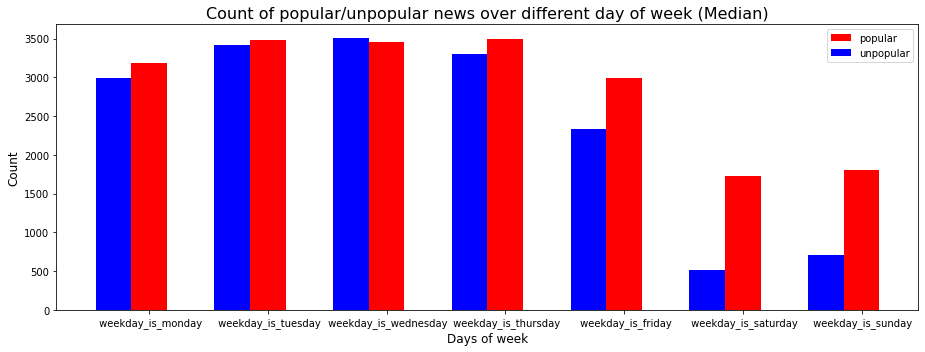

In [18]:
# Ploting graph keeping thresold of median
Unpop2=Df[Df[' shares']<b]
Pop2=Df[Df[' shares']>=b]
Unpop_day2 = Unpop2[Wd].sum().values
Pop_day2 = Pop2[Wd].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day2, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [19]:
Dc = Df.columns.values[12:18]

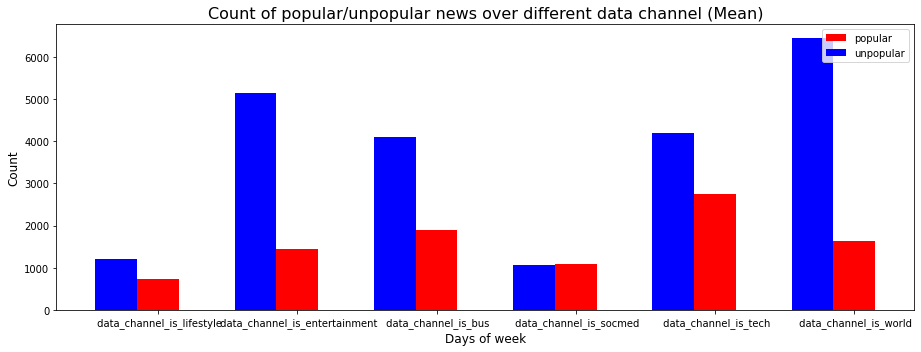

In [20]:
Unpop3=Df[Df[' shares']<a]
Pop3=Df[Df[' shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

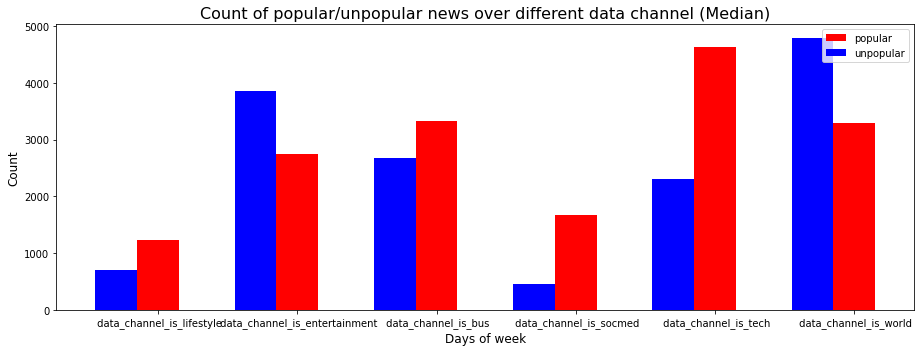

In [21]:
Unpop4=Df[Df[' shares']<b]
Pop4=Df[Df[' shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [22]:
Df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000
mean,354.158681,10.397652,548.003878,0.549837,1.000054,0.691710,10.697416,3.301716,4.392391,1.207245,4.556879,7.209686,0.052252,0.178855,0.162640,0.058082,0.187993,0.219420,26.190976,1127.806735,308.206452,13446.644378,751293.511212,257236.617084,1099.308132,5514.454228,3079.906629,3718.795323,9822.162959,6028.616075,0.167141,0.186773,0.188780,0.184170,0.144174,0.060983,0.067979,0.128962,0.186966,0.141061,0.222292,0.213304,0.236350,0.441863,0.119269,0.039656,0.016548,0.683950,0.287742,0.352991,0.095102,0.755694,-0.258127,-0.519999,-0.107108,0.278315,0.069762,0.341817,0.153017,1916.493289
std,215.074763,2.111650,466.667431,3.650036,5.423444,3.384602,11.048906,3.858062,8.148712,3.995676,0.824072,1.914303,0.222538,0.383236,0.369042,0.233901,0.390712,0.413859,69.724630,3482.657581,557.322674,58055.525616,215859.399218,134269.492663,1121.249318,5624.716125,1239.629462,19179.551270,40143.476787,23680.368241,0.373107,0.389734,0.391339,0.387628,0.351271,0.239303,0.251713,0.335163,0.264834,0.219887,0.286086,0.289295,0.290235,0.114811,0.096084,0.017373,0.010726,0.188447,0.155872,0.102900,0.070565,0.246156,0.126665,0.289563,0.094532,0.321649,0.261200,0.189089,0.222884,1539.713392
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,163.000000,9.000000,249.000000,0.471080,1.000000,0.626766,4.000000,1.000000,1.000000,0.000000,4.480788,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.348333,0.000000,843300.000000,172033.333333,0.000000,3535.055510,2362.863470,627.000000,1000.000000,961.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025058,0.025012,0.028572,0.025606,0.028

In [23]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X = Df.iloc[:,0:59]
y = Df[' shares']

In [25]:
# sns.pairplot(Df, kind="reg")
# plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [27]:
st_scale = StandardScaler().fit(X_train)

X_train_scaled = st_scale.transform(X_train)
X_test_scaled = st_scale.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

In [29]:
predictors = [
              LinearRegression(),
              DecisionTreeRegressor(random_state=0, criterion='mae'),
              RandomForestRegressor(random_state=42),
              GradientBoostingRegressor(n_estimators=100, max_depth=4)
]

LinearRegression
====Results===
RMSE = 391327866537.66
MAE = 4556489984.61


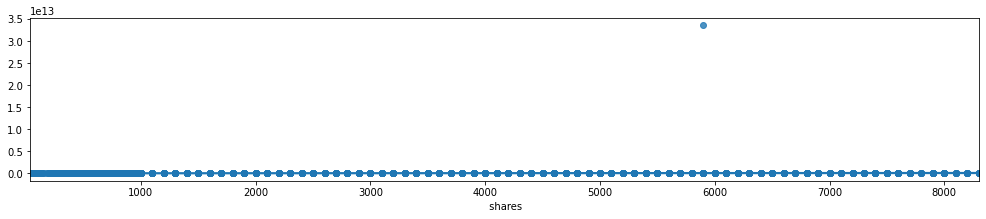

DecisionTreeRegressor
====Results===
RMSE = 2153.16
MAE = 1444.9


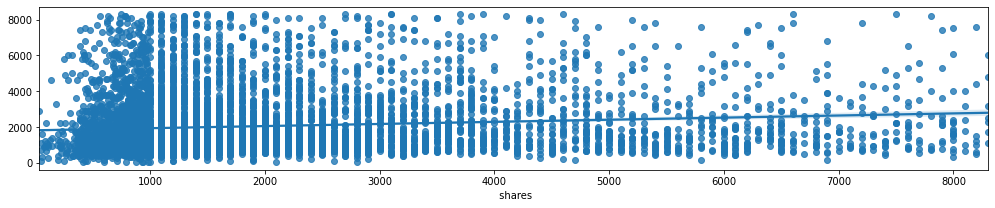

RandomForestRegressor
====Results===
RMSE = 1475.78
MAE = 1065.96


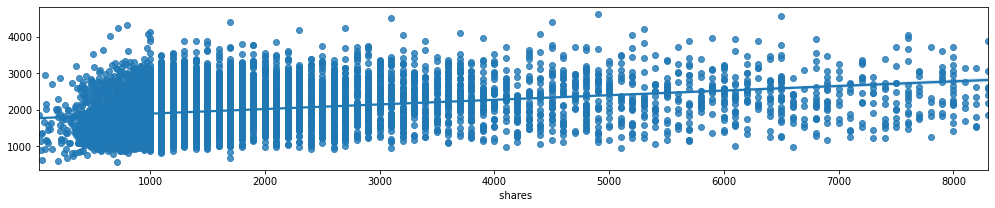

GradientBoostingRegressor
====Results===
RMSE = 1444.41
MAE = 1014.64


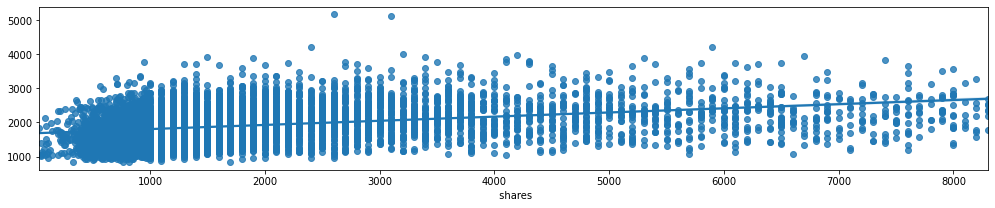

In [32]:
for model in predictors:
  model.fit(X_train_scaled,y_train)
  name = model.__class__.__name__

  print('='*30)
  print(name)

  print("====Results===")
  y_pred = model.predict(X_test_scaled)
  rmse = sqrt(mean_squared_error(y_test, y_pred))
  print(f'RMSE = {round(rmse,2)}')

  mae = mean_absolute_error(y_test,y_pred)
  print(f'MAE = {round(mae,2)}')

  f, ax = plt.subplots(figsize=(17, 3))
  sns.regplot(x=y_test, y=y_pred)
  plt.show()



In [33]:
Df[' shares'].median()

1300.0

### **Cross Validation**

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [36]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

In [37]:
for model in predictors:
  model.fit(X_train_scaled,y_train)
  name = model.__class__.__name__

  print('='*30)
  print(name)

  scores = cross_val_score(model, X_train_scaled, y_train,scoring="neg_mean_squared_error", cv=10)
  forest_rmse_scores = np.sqrt(-scores)
  display_scores(forest_rmse_scores)

LinearRegression
Scores: [1466.80573876 1444.47093734 1477.77941626 1452.06570422 1481.32554591
 1510.19818957 1465.25212957 1451.98514525 1459.88040571 1470.3651396 ]
Mean: 1468.012835218477
DecisionTreeRegressor
Scores: [2116.8262292  2110.19437443 2128.57248673 2091.24219431 2232.57515872
 2108.01181887 2119.66909794 2086.9236622  2105.2500994  2132.3286092 ]
Mean: 2123.159373098922
RandomForestRegressor
Scores: [1471.84622112 1439.29764888 1477.2686223  1437.45637358 1478.96981533
 1499.91018287 1458.424706   1450.68317613 1471.84884544 1455.41373924]
Mean: 1464.111933089234
GradientBoostingRegressor
Scores: [1441.52904668 1419.62802138 1450.25788902 1428.21769547 1452.80169757
 1474.80021666 1432.30320179 1427.25953037 1433.10137213 1438.11423316]
Mean: 1439.8012904230602


In [45]:
gb_reg = predictors[3]
gb_reg.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

In [50]:
df_shares = pd.DataFrame(list(y_pred), list(y_test))   
df_shares.reset_index(level=0, inplace=True)
df_shares_AvsP = df_shares.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_shares_AvsP.head()

,Actual shares,Predicted shares
0,1500,2050.671259
1,1100,1778.319265
2,2300,2392.657460
3,928,1180.343553
4,4800,2025.650303


### As analysis done pre-Cross Validation and post-Cross Validation Gradient Boosting Regressor gives better performance based on RMSE 